In [75]:
import pandas as pd
import numpy as np
from numpy import save, load
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from datetime import datetime
%matplotlib inline
import json

np.random.seed(2)

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import itertools

from tensorflow.keras.utils import to_categorical # convert to one-hot-encoding # .np_utils
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau,TensorBoard, EarlyStopping


sns.set(style='white', context='notebook', palette='deep')

In [ ]:
# print(train_X.shape)
# print(train_Y.shape)
# print(val_X.shape)
# print(val_Y.shape)
# print(test_X.shape)
# print(test_Y.shape)

In [103]:
data_path = "D:/Άκης/Data_Science/Deree/ITC6125A1 - MACHINE LEARNING & APPLICATIONS/Project/data/Gray/"

# Load datasets
train_X = load(path+'train_X.npy')
train_Y = load(path+'train_Y.npy')
val_X = load(path+'val_X.npy')
val_Y = load(path+'val_Y.npy')
test_X = load(path+'test_X.npy')
test_Y = load(path+'test_Y.npy')

# Take subsets of datasets
train_X =train_X[0:90000]
train_Y_initial =train_Y[0:90000]
val_X =val_X[0:5000]
val_Y_initial =val_Y[0:5000]
test_X =test_X[0:5000]
test_Y_initial =test_Y[0:5000]

# Normalize the data
train_X = train_X / 255.0
val_X = val_X / 255.0
test_X = test_X / 255.0

# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
train_X = train_X.reshape(-1,28,28,1)
val_X = val_X.reshape(-1,28,28,1)
test_X = test_X.reshape(-1,28,28,1)

labelencoder = LabelEncoder()
# Assigning numerical values 
train_Y_labeled = labelencoder.fit_transform(train_Y_initial)
val_Y_labeled = labelencoder.transform(val_Y_initial)
test_Y_labeled = labelencoder.transform(test_Y_initial)

# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
cap_letters = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
train_Y = to_categorical(train_Y_labeled, num_classes = len(cap_letters))
val_Y = to_categorical(val_Y_labeled, num_classes = len(cap_letters))
test_Y = to_categorical(test_Y_labeled, num_classes = len(cap_letters))

In [104]:
len(train_X)

90000

In [64]:
# Keep encoding of labes on dictionary
dict = {}
tuples_list =[]
for i, l in zip(val_Y_initial, val_Y_labeled):
    tp = (i,l)
    if tp in tuples_list:
        pass
    else:
        tuples_list.append(tp)
        dict[str(l)] = i

data_path =  "D:/Άκης/Data_Science/Deree/ITC6125A1 - MACHINE LEARNING & APPLICATIONS/Project/data/Json/"
with open(data_path+"tuples.json", "w") as outfile:
    json.dump(dict, outfile)

In [70]:
print(len(train_Y[0]))
print(len(val_Y[0]))
print(len(test_Y[0]))

26
26
26


In [4]:
# Set the CNN model Old Architecture
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out

# model = Sequential()

# model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
#                  activation ='relu', input_shape = (28,28,1)))
# model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
#                  activation ='relu'))
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.25))


# model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
#                  activation ='relu'))
# model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
#                  activation ='relu'))
# model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
# model.add(Dropout(0.25))


# model.add(Flatten())
# model.add(Dense(256, activation = "relu"))
# model.add(Dropout(0.5))
# model.add(Dense(26, activation = "softmax"))

# model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0

In [105]:
# Set the CNN model 
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dense(64, activation='relu'))

model.add(Dense(26, activation = "softmax"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)             

In [106]:
# Define the optimizer
#optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)

# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

es = EarlyStopping(monitor='val_loss', verbose=1, patience=2)
# Define tensorboard parameters and folders for save
now = datetime.now().strftime('%Y-%m-%d_%H-%M-%S') 
tensorboard = TensorBoard(log_dir=f'.\logs\logs_{now}', histogram_freq=1,write_images=True)
#tensorboard = TensorBoard(log_dir=f'.\logs', histogram_freq=1,write_images=True)
keras_callbacks = [tensorboard, es, learning_rate_reduction]

In [107]:
epochs = 30
batch_size = 86

history = model.fit(train_X,
                    train_Y,
                    batch_size = batch_size,
                    epochs = epochs,
                    callbacks=[keras_callbacks],
                    validation_data = (val_X, val_Y),
                     verbose = 2)
score = model.evaluate(test_X, test_Y)
print('loss={}, acc={}'.format(score[0],score[1]))
model.save(f"models/model_batch_size_{batch_size}_epochs_{epochs}_train_{len(train_X)}.h5")
print("Saved model to disk")

Epoch 1/30
1047/1047 - 179s - loss: 0.7957 - accuracy: 0.7954 - val_loss: 0.4607 - val_accuracy: 0.8922
Epoch 2/30
1047/1047 - 241s - loss: 0.4492 - accuracy: 0.8936 - val_loss: 0.3969 - val_accuracy: 0.9110
Epoch 3/30
1047/1047 - 183s - loss: 0.3955 - accuracy: 0.9066 - val_loss: 0.3703 - val_accuracy: 0.9154
Epoch 4/30
1047/1047 - 177s - loss: 0.3647 - accuracy: 0.9141 - val_loss: 0.3509 - val_accuracy: 0.9230
Epoch 5/30
1047/1047 - 182s - loss: 0.3446 - accuracy: 0.9184 - val_loss: 0.3523 - val_accuracy: 0.9244
Epoch 6/30
1047/1047 - 155s - loss: 0.3271 - accuracy: 0.9232 - val_loss: 0.3414 - val_accuracy: 0.9262
Epoch 7/30
1047/1047 - 176s - loss: 0.3127 - accuracy: 0.9262 - val_loss: 0.3452 - val_accuracy: 0.9228
Epoch 8/30
1047/1047 - 182s - loss: 0.2992 - accuracy: 0.9300 - val_loss: 0.3354 - val_accuracy: 0.9264
Epoch 9/30
1047/1047 - 194s - loss: 0.2889 - accuracy: 0.9319 - val_loss: 0.3274 - val_accuracy: 0.9278
Epoch 10/30
1047/1047 - 172s - loss: 0.2777 - accuracy: 0.9350 -

In [108]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

In [109]:
hist

,loss,accuracy,val_loss,val_accuracy,lr,epoch
0,0.795690,0.795400,0.460652,0.8922,0.001,0
1,0.449173,0.893578,0.396885,0.9110,0.001,1
2,0.395451,0.906578,0.370308,0.9154,0.001,2
3,0.364741,0.914067,0.350885,0.9230,0.001,3
4,0.344614,0.918378,0.352307,0.9244,0.001,4
5,0.327092,0.923156,0.341351,0.9262,0.001,5
6,0.312654,0.926189,0.345213,0.9228,0.001,6
7,0.299239,0.930011,0.335443,0.9264,0.001,7
8,0.288870,0.931889,0.327361,0.9278,0.001,8
9,0.277729,0.935022,0.334097,0.9256,0.001,9


In [100]:
# # With data augmentation to prevent overfitting (accuracy 0.99286)

# datagen = ImageDataGenerator(
#         featurewise_center=False,  # set input mean to 0 over the dataset
#         samplewise_center=False,  # set each sample mean to 0
#         featurewise_std_normalization=False,  # divide inputs by std of the dataset
#         samplewise_std_normalization=False,  # divide each input by its std
#         zca_whitening=False,  # apply ZCA whitening
#         rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
#         zoom_range = 0.1, # Randomly zoom image 
#         width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
#         height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
#         horizontal_flip=False,  # randomly flip images
#         vertical_flip=False)  # randomly flip images


# datagen.fit(train_X)

# # Fit the model
# epochs = 30
# batch_size = 86
# history = model.fit(datagen.flow(train_X,train_Y, batch_size=batch_size),
#                               epochs = epochs,
#                               validation_data = (val_X, val_Y),
#                               verbose = 2,
#                               callbacks=[keras_callbacks])
# score = model.evaluate(test_X, test_Y)
# print('loss={}, acc={}'.format(score[0],score[1]))
# model.save(f"models/model_batch_size_{batch_size}_epochs_{epochs}_imagegenerator_.h5")
# print("Saved model to disk")

In [17]:
model = load_model('models/model_batch_size_86_epochs_20.h5')

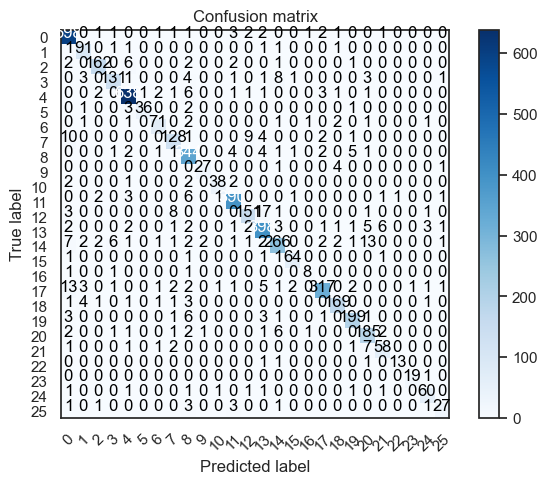

In [87]:
# Look at confusion matrix 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(test_X)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(test_Y,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(26)) 

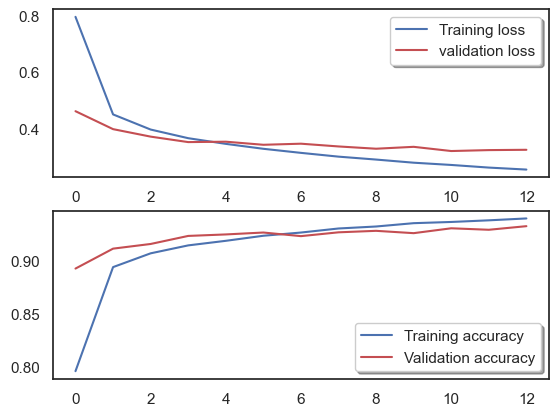

In [110]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

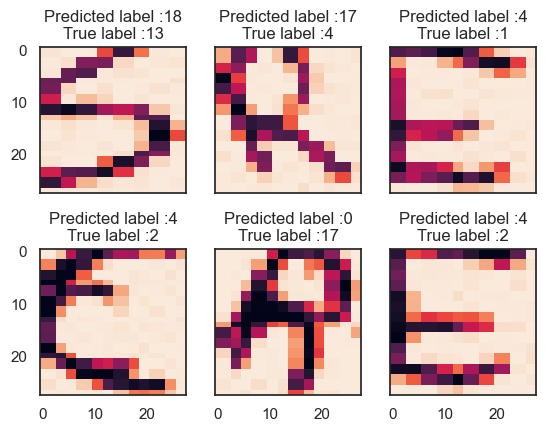

In [88]:
# Display some error results 

# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = test_X[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

In [90]:
dict

{'9': 'J',
 '4': 'E',
 '0': 'A',
 '13': 'N',
 '17': 'R',
 '14': 'O',
 '2': 'C',
 '7': 'H',
 '20': 'U',
 '15': 'P',
 '12': 'M',
 '8': 'I',
 '11': 'L',
 '3': 'D',
 '1': 'B',
 '19': 'T',
 '18': 'S',
 '21': 'V',
 '24': 'Y',
 '16': 'Q',
 '6': 'G',
 '25': 'Z',
 '23': 'X',
 '5': 'F',
 '10': 'K',
 '22': 'W'}